In [ ]:
library(tidyverse)
library(lubridate)
library(CausalImpact)
#install.packages("CausalImpact")
library(CausalImpact)

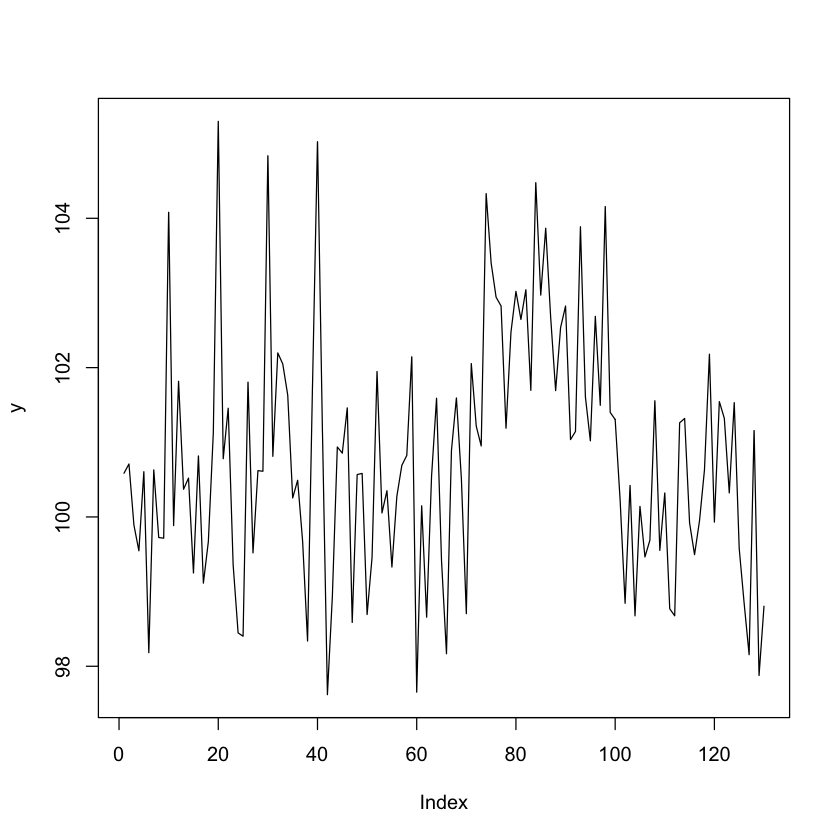

In [98]:
set.seed(12345)
x1 <- 100 #+ arima.sim(model = list(ar = 0.0001), n = 150)
y <-x1 + rnorm(130)
x2<-rep(0,130)
x2[c(10,20,30,40)]<-1
y[71:100] <- y[71:100] + 2 #71:100 까지 +1 intervension effect
y[101:130] <- y[101:130] + 0 #121:150  +0
y[which(x2==1)]<-y[which(x2==1)]+5
data <- cbind(y, x2)


#matplot(data, type = "l")
plot(y,type='l')

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   102            3073        
Prediction (s.d.)        100 (0.23)     3006 (6.99) 
95% CI                   [100, 101]     [2992, 3020]
                                                    
Absolute effect (s.d.)   2.2 (0.23)     67.0 (6.99) 
95% CI                   [1.8, 2.7]     [52.9, 80.8]
                                                    
Relative effect (s.d.)   2.2% (0.23%)   2.2% (0.23%)
95% CI                   [1.8%, 2.7%]   [1.8%, 2.7%]

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.89909%

For more details, type: summary(impact, "report")



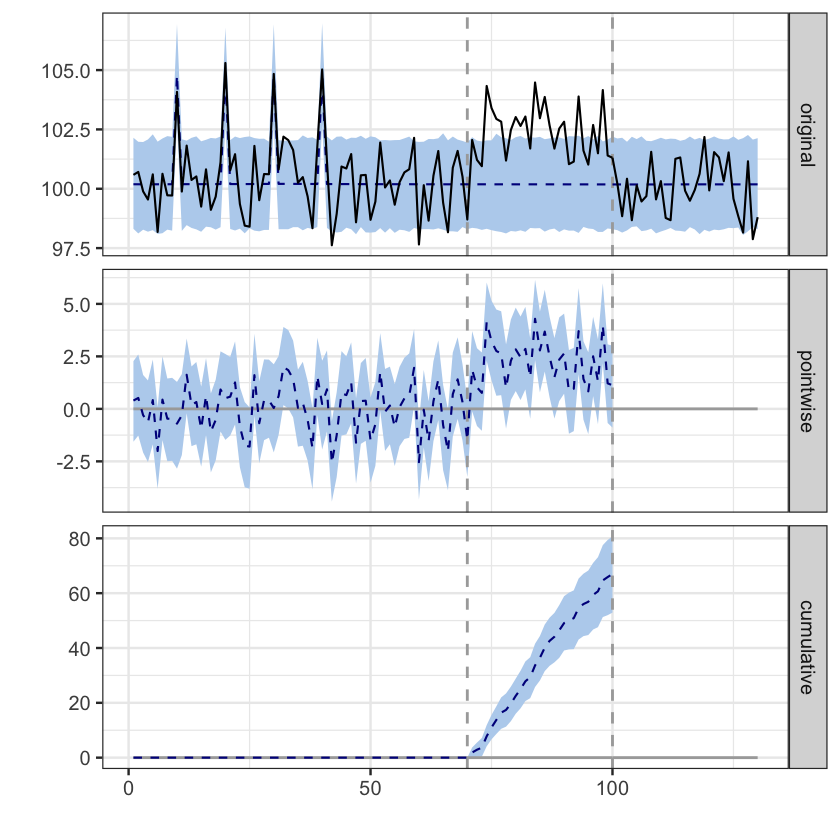

In [99]:
pre.period <- c(1, 70)
post.period <- c(71, 100)

impact <- CausalImpact(data, pre.period, post.period) #평균 모형 적합
plot(impact)
summary(impact)


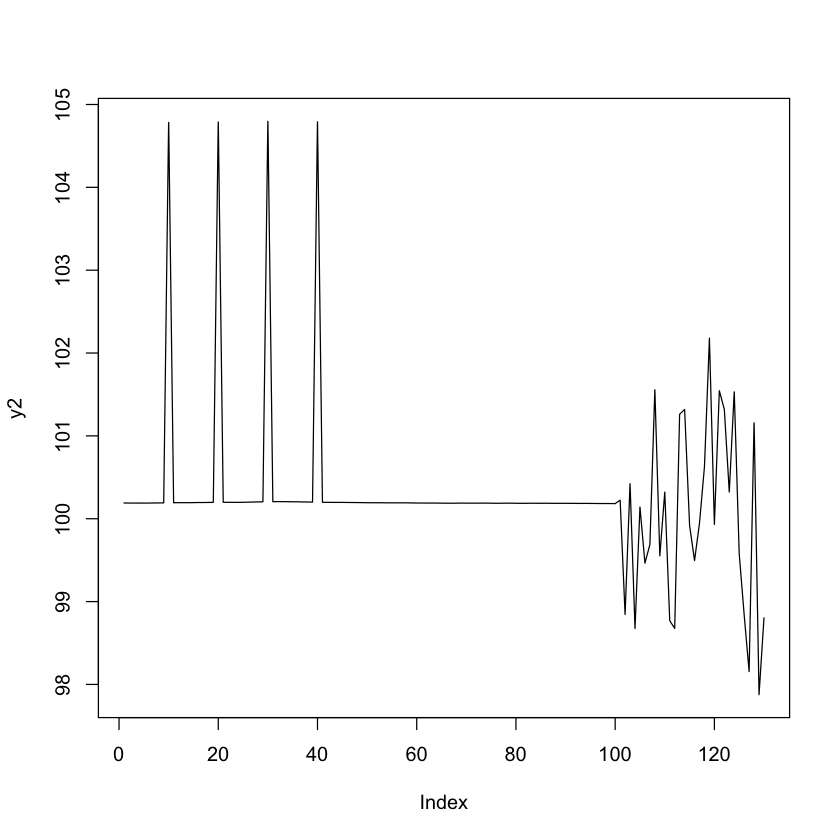

Posterior inference {CausalImpact}

                         Average             Cumulative       
Actual                   100                 3000             
Prediction (s.d.)        100 (0.07)          3006 (2.09)      
95% CI                   [100, 100]          [3001, 3010]     
                                                              
Absolute effect (s.d.)   -0.18 (0.07)        -5.48 (2.09)     
95% CI                   [-0.33, -0.043]     [-9.78, -1.291]  
                                                              
Relative effect (s.d.)   -0.18% (0.069%)     -0.18% (0.069%)  
95% CI                   [-0.33%, -0.043%]   [-0.33%, -0.043%]

Posterior tail-area probability p:   0.00707
Posterior prob. of a causal effect:  99.29293%

For more details, type: summary(impact, "report")



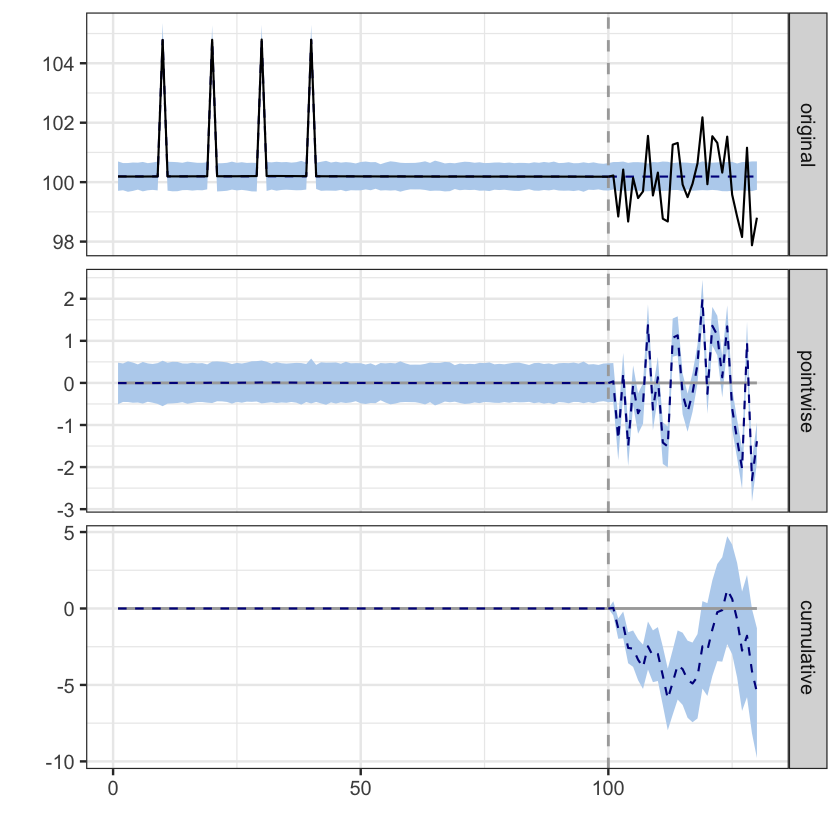

In [100]:
pre.period <- c(1, 100)
post.period <- c(101, 130)
y2<-y
y2[1:100]<-impact$series[,3][1:100] #예측값 대입
data2 <- cbind(y2, x2)
#matplot(data2, type = "l")
plot(y2,type='l')
impact <- CausalImpact(data2, pre.period, post.period)
plot(impact)
summary(impact)